In [1]:
# Load Libraries
library(Seurat)
library(SeuratWrappers)
library(dplyr)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(data.table)

# Set Working Directory
setwd("../")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




# Load Xenium Data

In [2]:
path.pro <- "GBMProject/XeniumData/TXP_O11-PRO" 
xenium.pro <- LoadXenium(path.pro, fov = "fov") # Load the Xenium data
xenium.pro <- subset(xenium.pro, subset = nCount_Xenium > 0) # remove cells with 0 counts

clusters <- read.csv("GBMProject/GBMOrganoid/CCspatialclusters_PROtxp.csv")
xenium.pro <- AddMetaData(object = xenium.pro, metadata = clusters, col.name = "cluster_cellcharter")

xenium.pro

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warn

An object of class Seurat 
541 features across 68900 samples within 4 assays 
Active assay: Xenium (266 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov

In [3]:
pro.tumor <- readRDS("GBMProject/GBMOrganoid/Checkpoints/protxp_subset.rds")
pro.tumor

An object of class Seurat 
547 features across 2754 samples within 5 assays 
Active assay: Xenium (266 features, 266 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: BlankCodeword, ControlCodeword, ControlProbe, niche
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: fov zoom

In [4]:
path.mes <- "GBMProject/XeniumData/TXP_O8-MES-1" 
xenium.mes <- LoadXenium(path.mes, fov = "fov") # Load the Xenium data
xenium.mes <- subset(xenium.mes, subset = nCount_Xenium > 0) # remove cells with 0 counts

clusters <- read.csv("GBMProject/GBMOrganoid/CCspatialclusters_MEStxp.csv")
xenium.mes <- AddMetaData(object = xenium.mes, metadata = clusters, col.name = "cluster_cellcharter")

xenium.mes

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warn

An object of class Seurat 
541 features across 39277 samples within 4 assays 
Active assay: Xenium (266 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov

In [5]:
mes.tumor <- readRDS("GBMProject/GBMOrganoid/Checkpoints/mestxp_subset.rds")
mes.tumor

An object of class Seurat 
547 features across 15824 samples within 5 assays 
Active assay: Xenium (266 features, 266 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: BlankCodeword, ControlCodeword, ControlProbe, niche
 2 dimensional reductions calculated: pca, umap
 1 spatial field of view present: fov

In [4]:
pt.tumor <- readRDS("GBMProject/GBMOrganoid/Checkpoints/patient.rds")
pt.tumor

An object of class Seurat 
554 features across 40884 samples within 5 assays 
Active assay: Xenium (319 features, 319 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: BlankCodeword, ControlCodeword, ControlProbe, niche
 2 dimensional reductions calculated: pca, umap
 1 spatial field of view present: fov

# Find Niche Markers

In [5]:
Idents(pro.tumor) <- "niches"
DefaultAssay(pro.tumor) <- "Xenium"
pro.niche.markers <- FindAllMarkers(pro.tumor, only.pos = TRUE)

write.csv(pro.niche.markers, file = "GBMProject/GBMOrganoid/GeneLists/nichemarkers_protumor.csv")

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [6]:
Idents(mes.tumor) <- "niches"
DefaultAssay(mes.tumor) <- "Xenium"
mes.niche.markers <- FindAllMarkers(mes.tumor, only.pos = TRUE)

write.csv(mes.niche.markers, file = "GBMProject/GBMOrganoid/GeneLists/nichemarkers_mestumor.csv")

Calculating cluster 2

Calculating cluster 3

Calculating cluster 1

Calculating cluster 4



In [7]:
Idents(pt.tumor) <- "niches"
DefaultAssay(pt.tumor) <- "Xenium"
pt.niche.markers <- FindAllMarkers(pt.tumor, only.pos = TRUE)

write.csv(pt.niche.markers, file = "GBMProject/GBMOrganoid/GeneLists/nichemarkers_pttumor.csv")

Calculating cluster 4

Calculating cluster 1

Calculating cluster 3

Calculating cluster 2



Warning message:
“Removing 3 cells missing data for vars requested”


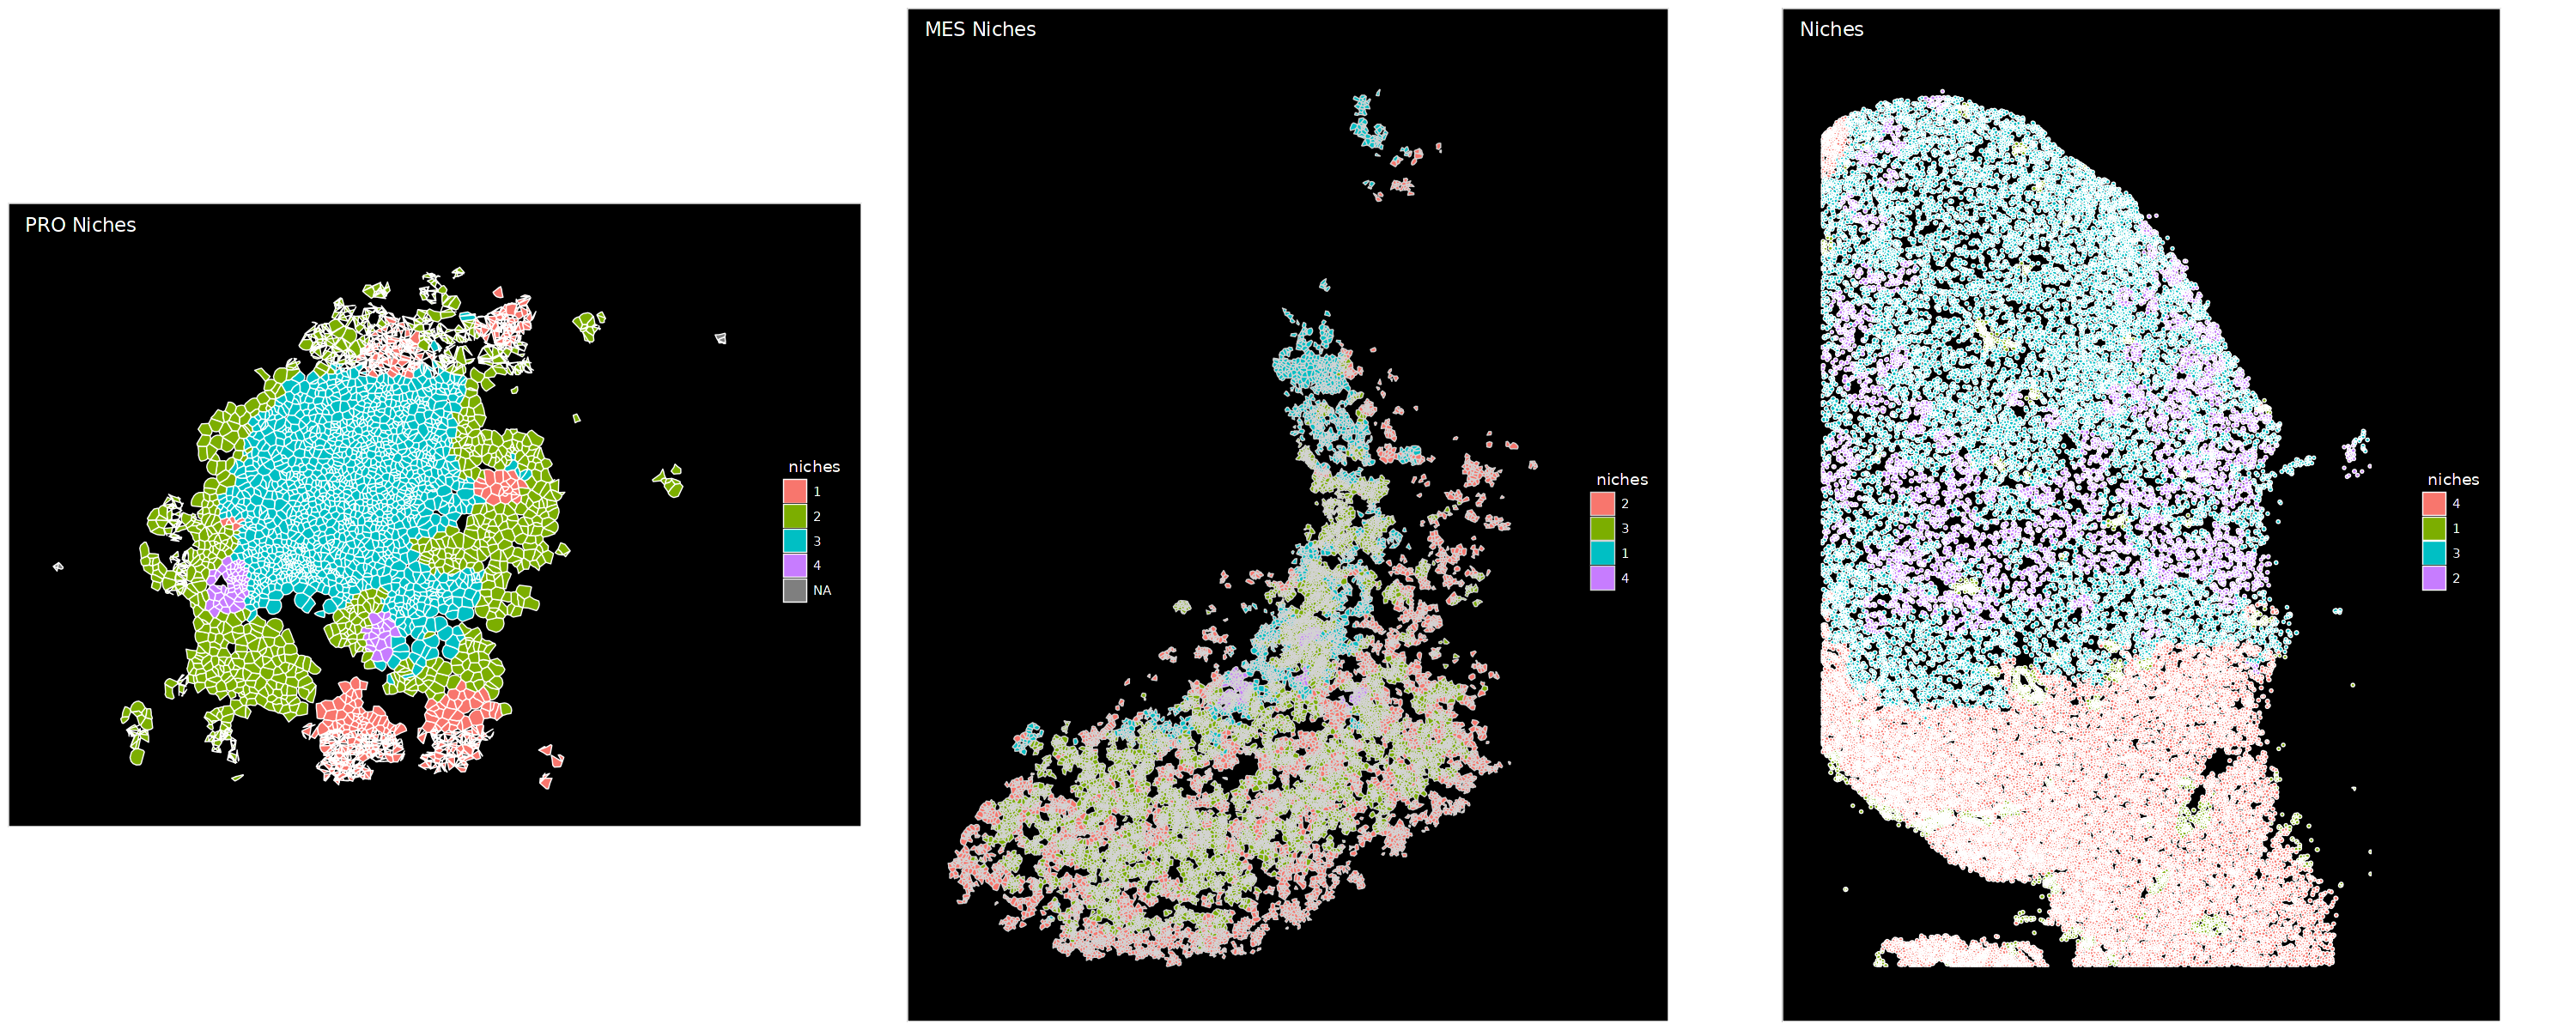

In [9]:
p1 <- ImageDimPlot(pro.tumor, boundaries = 'segmentation', group.by = "niches", 
             #cols=c("1"="forestgreen","2"="mediumorchid","3"="dodgerblue3","4"=""), 
             size = 1.5, dark.background = T, border.color = "white") + ggtitle("PRO Niches")

p2 <- ImageDimPlot(mes.tumor, boundaries = 'segmentation', group.by = "niches", 
             #cols=c("1"="forestgreen","2"="mediumorchid","3"="dodgerblue3","4"=""), 
             size = 1.5, dark.background = T, border.color = "lightgrey") + ggtitle("MES Niches")

p3 <- ImageDimPlot(pt.tumor, boundaries = 'segmentation', group.by = "niches", 
             #cols=c("1"="forestgreen","2"="mediumorchid","3"="dodgerblue3","4"=""), 
             size = 1.5, dark.background = T, border.color = "white") + ggtitle("Niches")

options(repr.plot.width = 25, repr.plot.height = 10)
p1 | p2 | p3

# Niche GSEA

In [27]:
pathways.h <- msigdbr(species = "human", category = "H") #c("H-hallmark gene sets","C5","C6","C8"))
pathways.h <- split(x = pathways.h$gene_symbol, f = pathways.h$gs_name)

pathways.c2 <- msigdbr(species = "human", category = "C2") #c("H","C2-curated gene sets,"C5","C6","C8"))
pathways.c2 <- split(x = pathways.c2$gene_symbol, f = pathways.c2$gs_name)

pathways.c5 <- msigdbr(species = "human", category = "C5") #c("H","C5-ontology gene sets","C6","C8"))
pathways.c5 <- split(x = pathways.c5$gene_symbol, f = pathways.c5$gs_name)

pathways.c6 <- msigdbr(species = "human", category = "C6") #c("H","C5","C6-oncogenic gene sets","C8"))
pathways.c6 <- split(x = pathways.c6$gene_symbol, f = pathways.c6$gs_name)

pathways.c8 <- msigdbr(species = "human", category = "C8") #c("H","C5","C6","C8-cell type gene sets"))
pathways.c8 <- split(x = pathways.c8$gene_symbol, f = pathways.c8$gs_name)

In [23]:
pro.niche.markers.1 = subset(pro.niche.markers, cluster == 1)
genelist.pro.1 = pro.niche.markers.1$avg_log2FC
names(genelist.pro.1) = as.character(pro.niche.markers.1$gene)
genelist.pro.1 = sort(genelist.pro.1, decreasing = T)

pro.niche.markers.2 = subset(pro.niche.markers, cluster == 2)
genelist.pro.2 = pro.niche.markers.2$avg_log2FC
names(genelist.pro.2) = as.character(pro.niche.markers.2$gene)
genelist.pro.2 = sort(genelist.pro.2, decreasing = T)

pro.niche.markers.3 = subset(pro.niche.markers, cluster == 3)
genelist.pro.3 = pro.niche.markers.3$avg_log2FC
names(genelist.pro.3) = as.character(pro.niche.markers.3$gene)
genelist.pro.3 = sort(genelist.pro.3, decreasing = T)

pro.niche.markers.4 = subset(pro.niche.markers, cluster == 4)
genelist.pro.4 = pro.niche.markers.4$avg_log2FC
names(genelist.pro.4) = as.character(pro.niche.markers.4$gene)
genelist.pro.4 = sort(genelist.pro.4, decreasing = T)

In [28]:
# PRO Niche 1
fgsea_pro.h <- fgsea(pathways.h, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.h, file="GBMProject/GBMOrganoid/GSEA/GSEA_H_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.h, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_h.rds")

fgsea_pro.c2 <- fgsea(pathways.c2, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c2, file="GBMProject/GBMOrganoid/GSEA/GSEA_C2_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c2, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c2.rds")

fgsea_pro.c5 <- fgsea(pathways.c5, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c5, file="GBMProject/GBMOrganoid/GSEA/GSEA_C5_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c5, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c5.rds")

fgsea_pro.c6 <- fgsea(pathways.c6, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c6, file="GBMProject/GBMOrganoid/GSEA/GSEA_C6_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c6, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c6.rds")

fgsea_pro.c8 <- fgsea(pathways.c8, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c8, file="GBMProject/GBMOrganoid/GSEA/GSEA_C8_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c8, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c8.rds")

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater t

In [ ]:
# PRO Niche 1
fgsea_pro.h <- fgsea(pathways.h, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.h, file="GBMProject/GBMOrganoid/GSEA/GSEA_H_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.h, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_h.rds")

fgsea_pro.c2 <- fgsea(pathways.c2, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c2, file="GBMProject/GBMOrganoid/GSEA/GSEA_C2_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c2, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c2.rds")

fgsea_pro.c5 <- fgsea(pathways.c5, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c5, file="GBMProject/GBMOrganoid/GSEA/GSEA_C5_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c5, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c5.rds")

fgsea_pro.c6 <- fgsea(pathways.c6, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c6, file="GBMProject/GBMOrganoid/GSEA/GSEA_C6_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c6, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c6.rds")

fgsea_pro.c8 <- fgsea(pathways.c8, genelist.pro.1, minSize=5, maxSize=500, eps=0.0)
fwrite(fgsea_pro.c8, file="GBMProject/GBMOrganoid/GSEA/GSEA_C8_PRO-WT.csv", sep=",", sep2=c("", " ", ""))
saveRDS(fgsea_pro.c8, file = "GBMProject/GBMOrganoid/Checkpoints/GSEA/pro1_c8.rds")

# Niche UMAPs

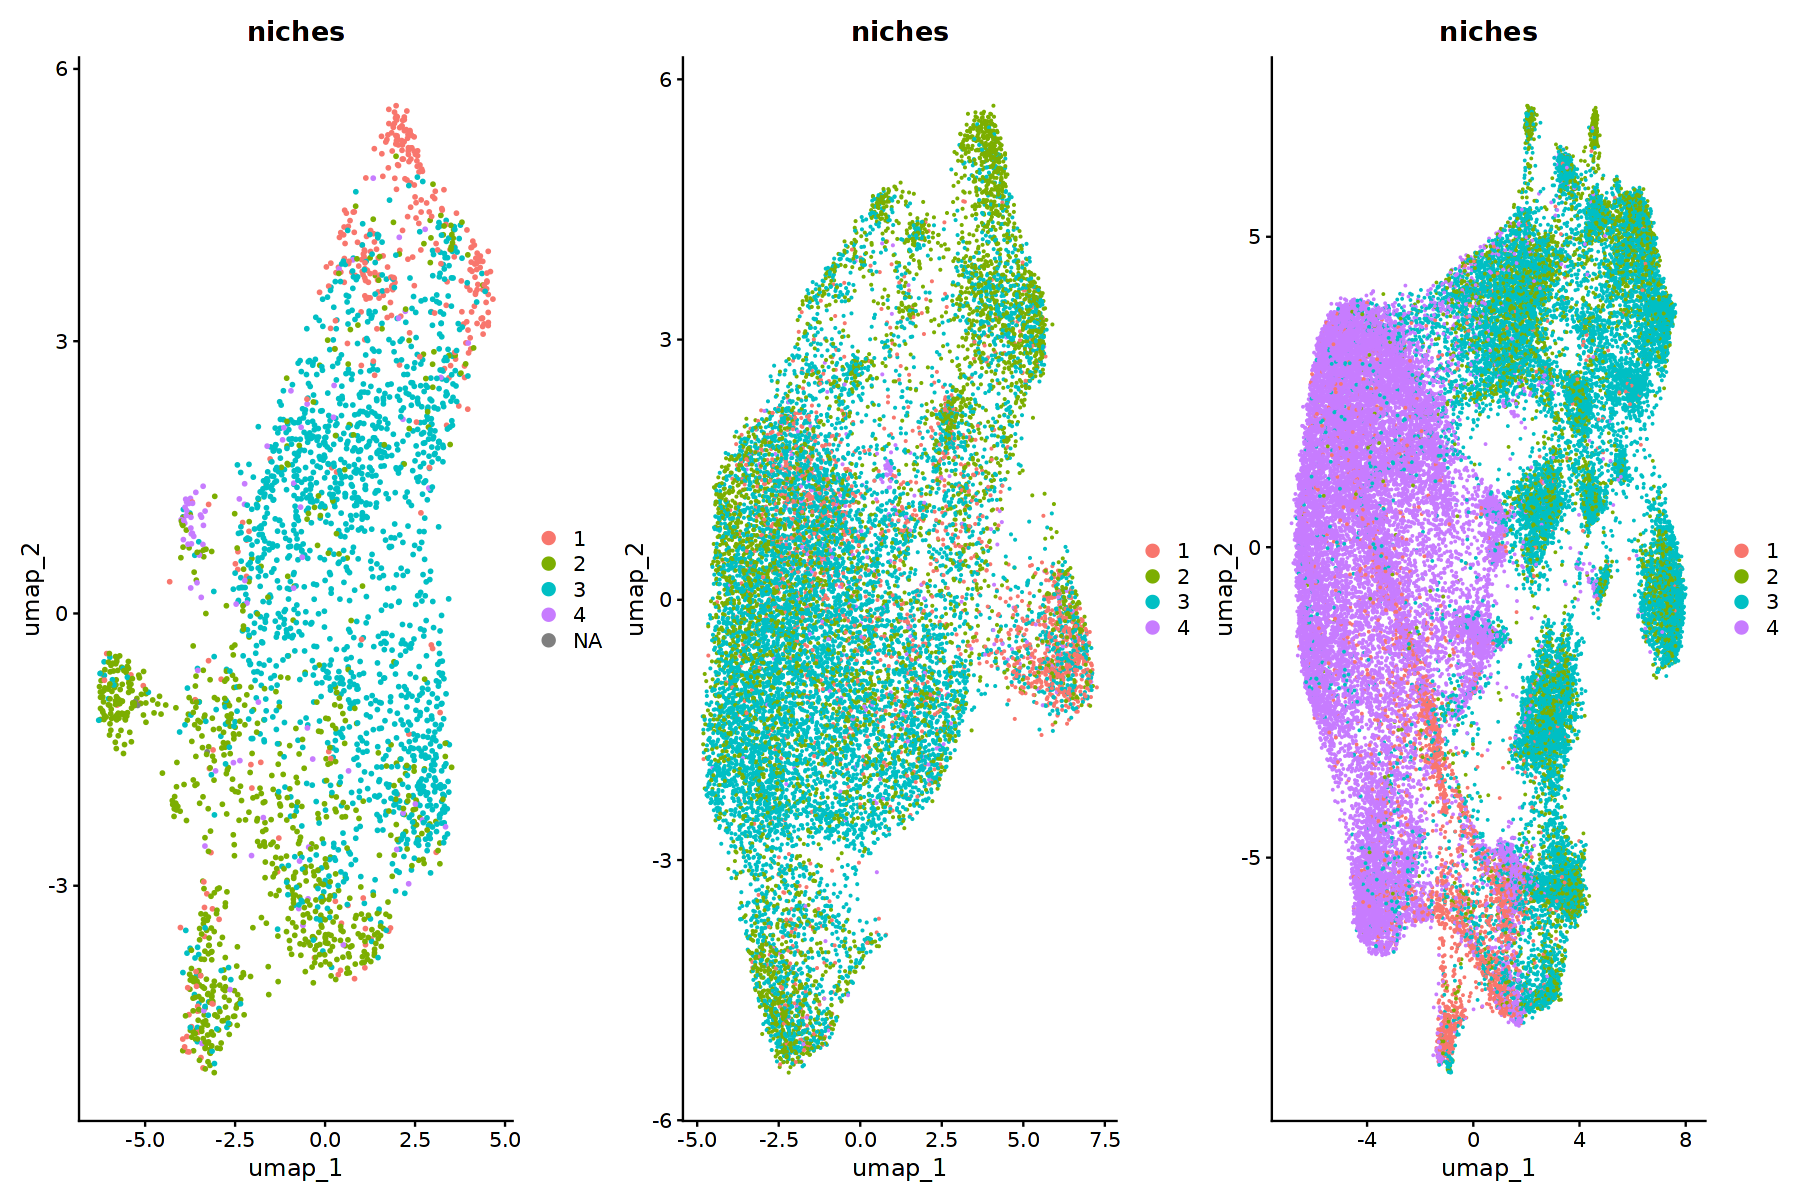

In [8]:
p1 <- DimPlot(pro.tumor, group.by="niches")
p2 <- DimPlot(mes.tumor, group.by="niches")
p3 <- DimPlot(pt.tumor, group.by="niches")

options(repr.plot.width = 15, repr.plot.height = 10)
p1 | p2 | p3

# Additional Gene Expression

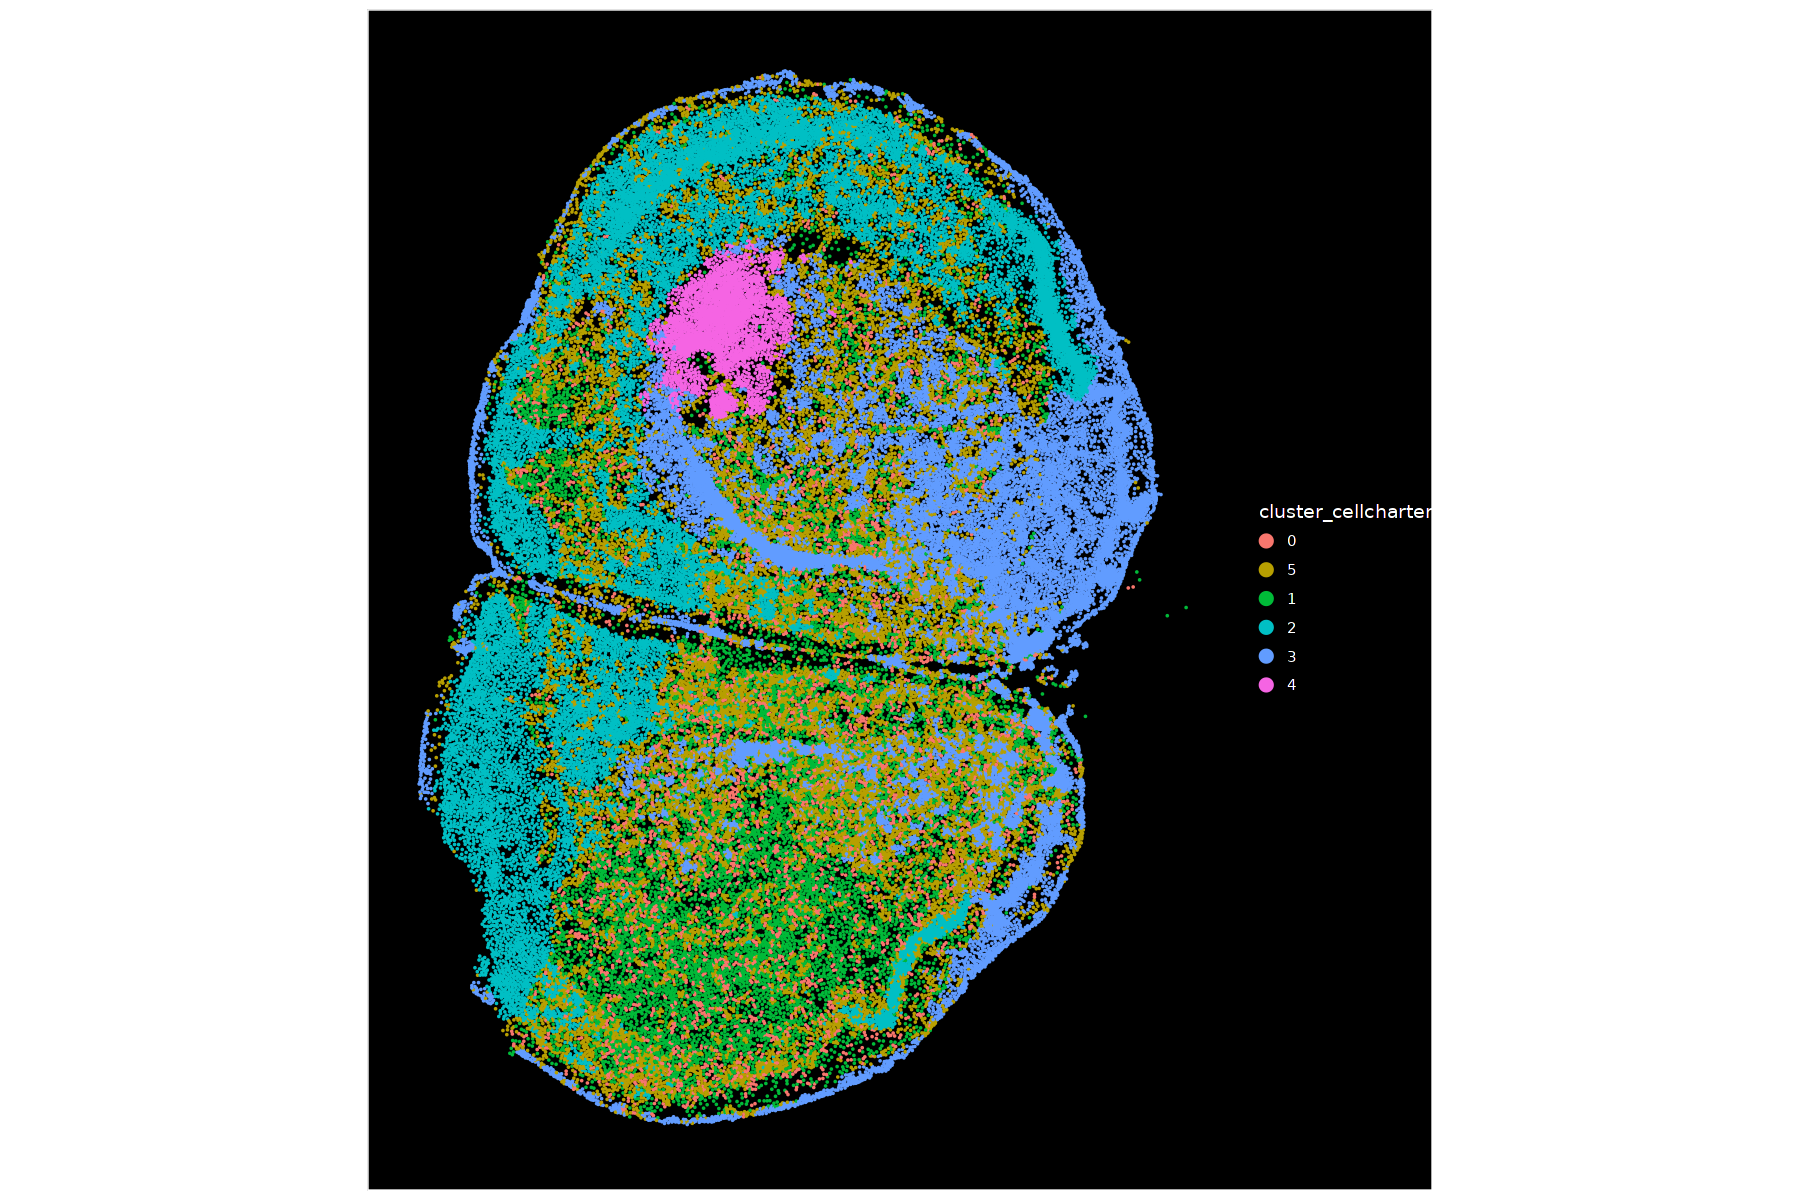

In [6]:
pc <- ImageDimPlot(xenium.pro, group.by="cluster_cellcharter", size = 0.75)

options(repr.plot.width = 15, repr.plot.height = 10)
pc

Warning message:
“No layers found matching search pattern provided”
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
“data layer is not found and counts layer is used”


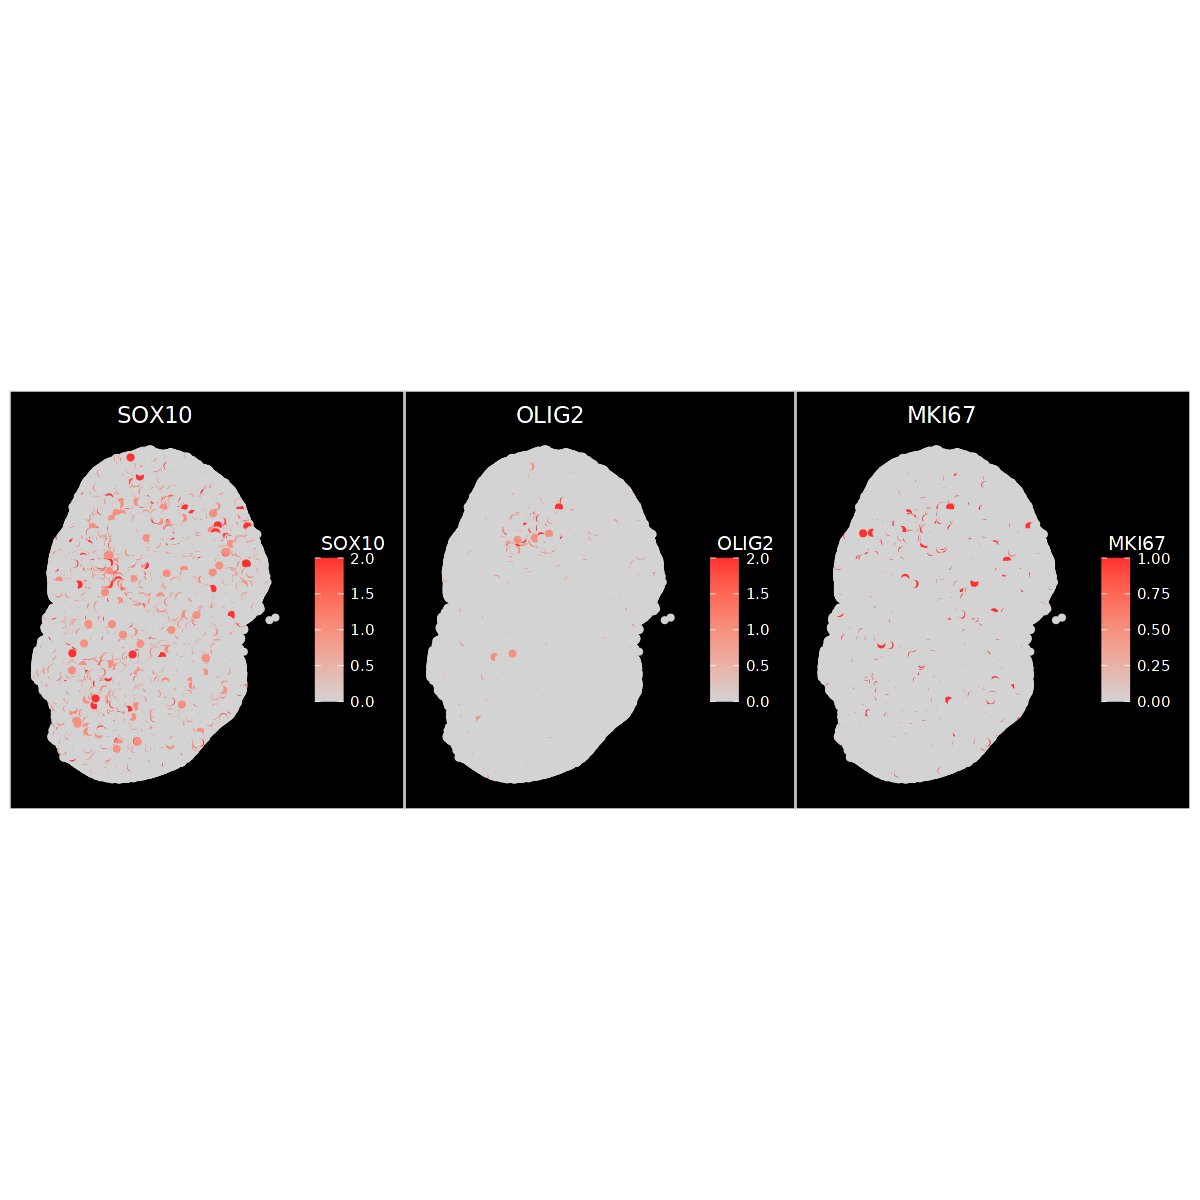

In [16]:
options(repr.plot.width=10, repr.plot.height=10)
ImageFeaturePlot(xenium.pro, fov = "fov", features = c("SOX10","OLIG2","MKI67"), 
                 combine=TRUE, size=2, axes=FALSE, max.cutoff = "q90")

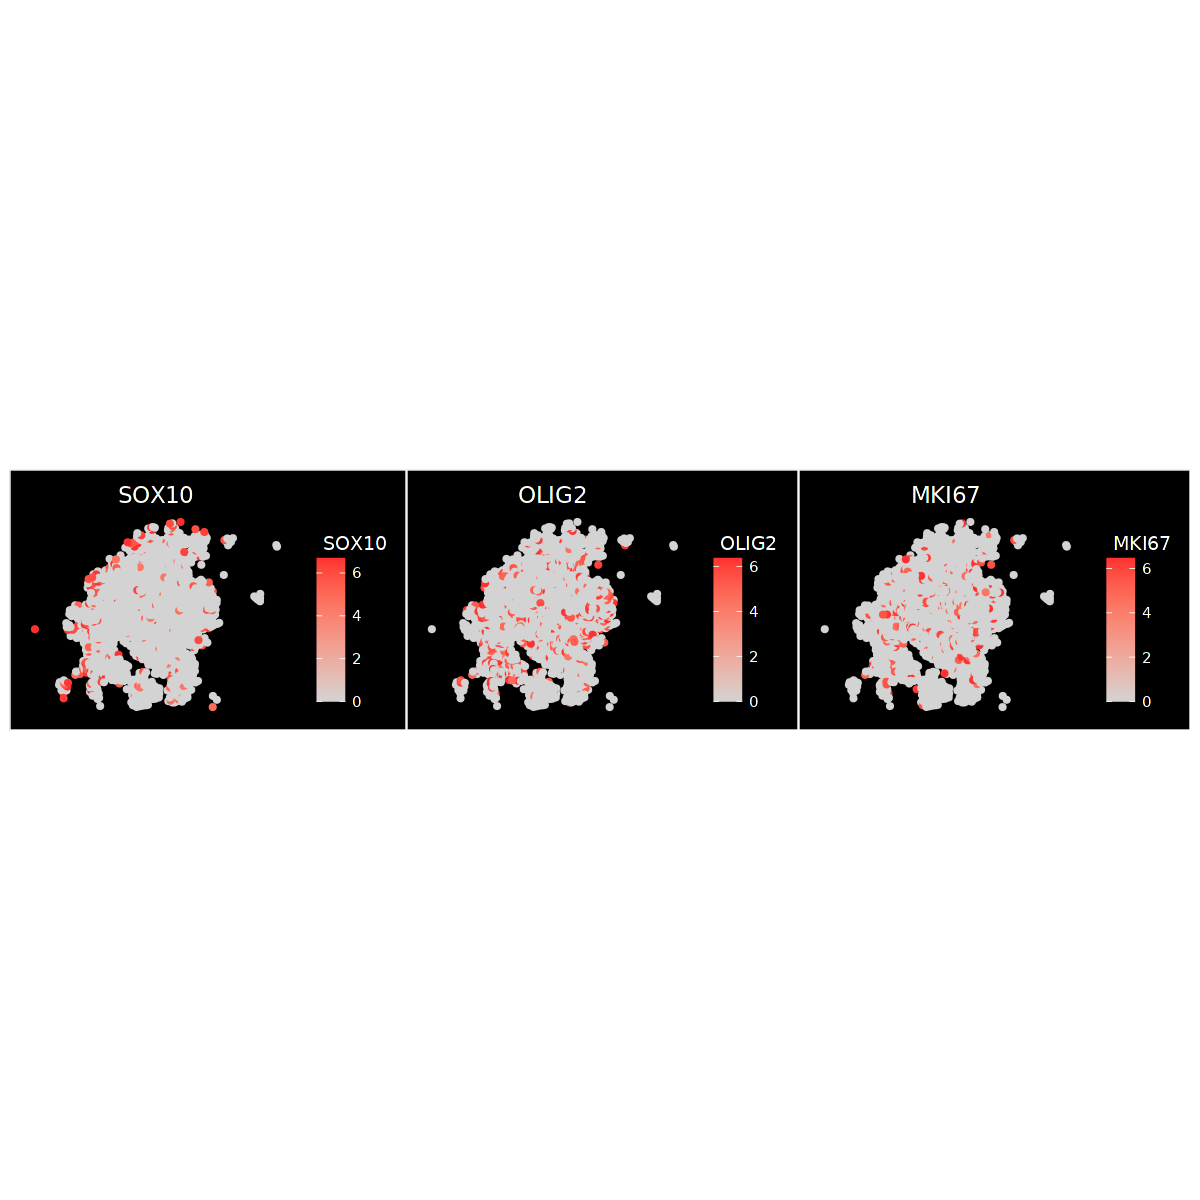

In [15]:
options(repr.plot.width=10, repr.plot.height=10)
ImageFeaturePlot(pro.tumor, fov = "fov", features = c("SOX10","OLIG2","MKI67"), 
                 combine=TRUE, size=2, axes=FALSE, max.cutoff = "q90")

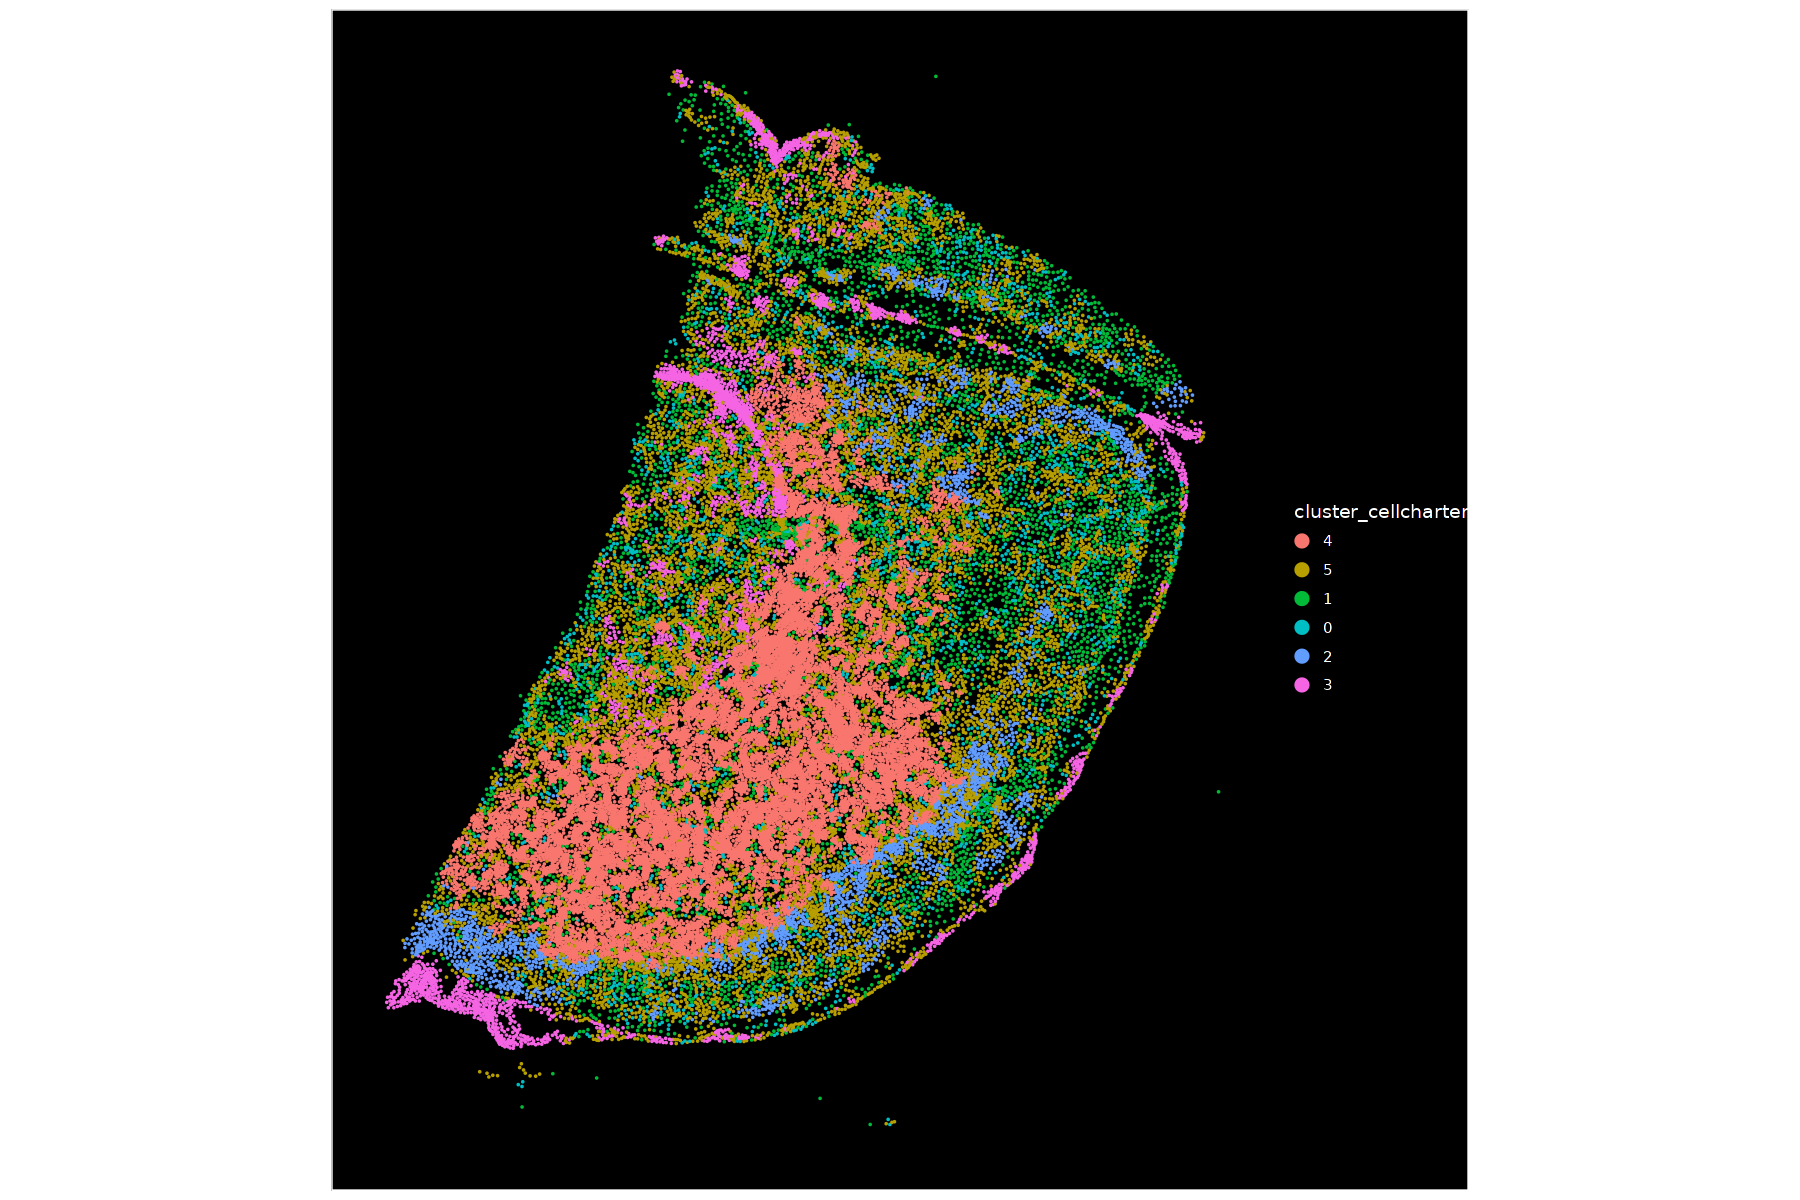

In [9]:
pc <- ImageDimPlot(xenium.mes, group.by="cluster_cellcharter", size = 0.75)

options(repr.plot.width = 15, repr.plot.height = 10)
pc

Warning message:
“No layers found matching search pattern provided”
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
“data layer is not found and counts layer is used”


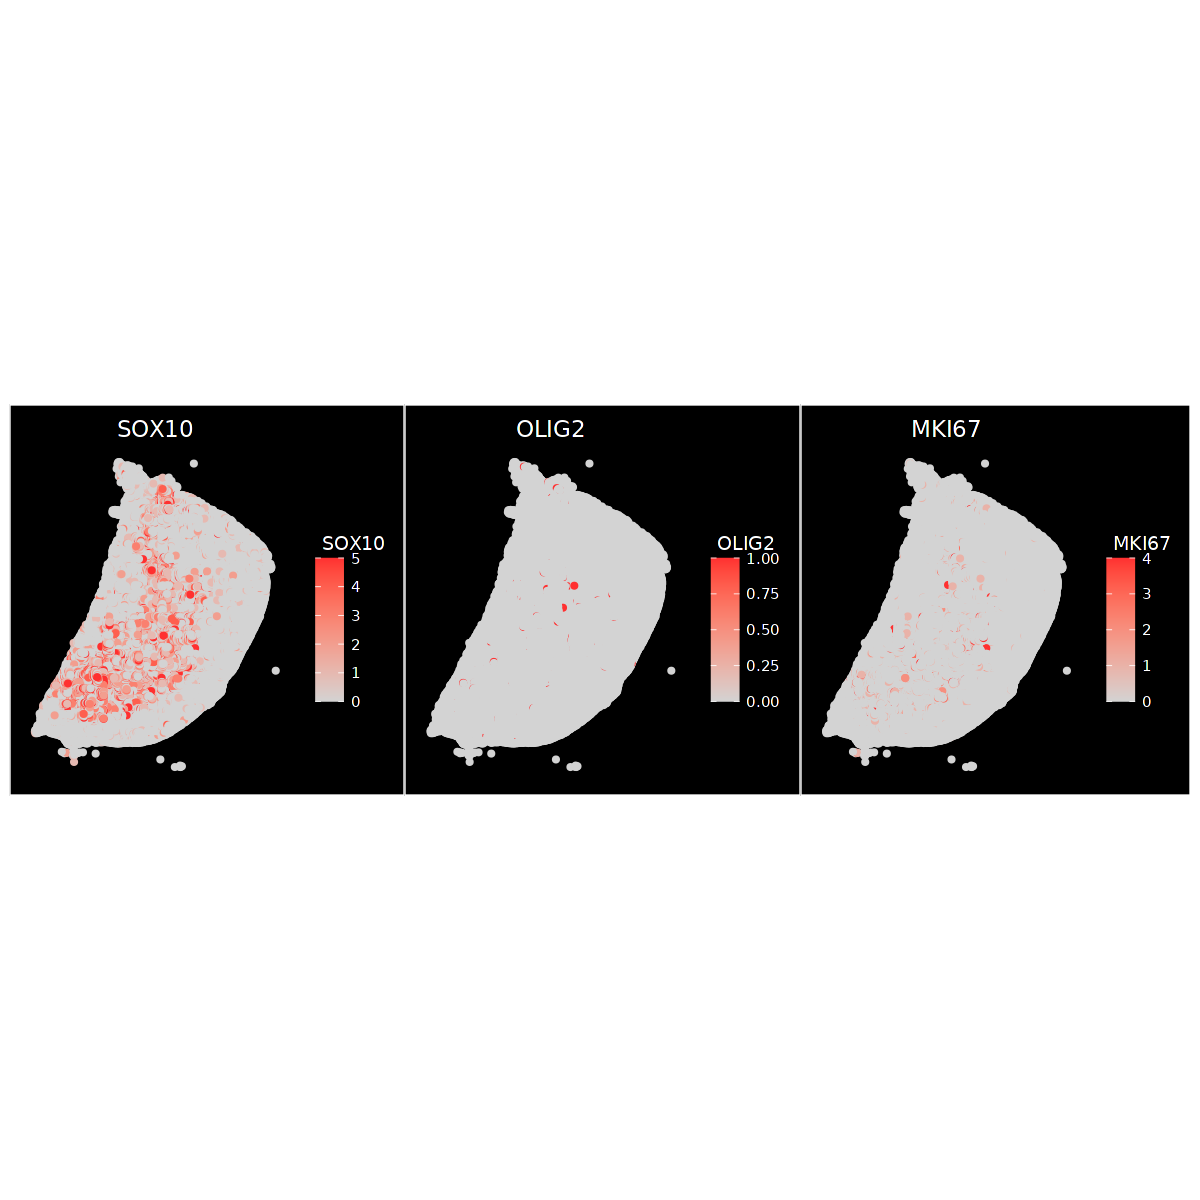

In [13]:
options(repr.plot.width=10, repr.plot.height=10)
ImageFeaturePlot(xenium.mes, fov = "fov", features = c("SOX10","OLIG2","MKI67"), 
                 combine=TRUE, size=2, axes=FALSE, max.cutoff = "q90")

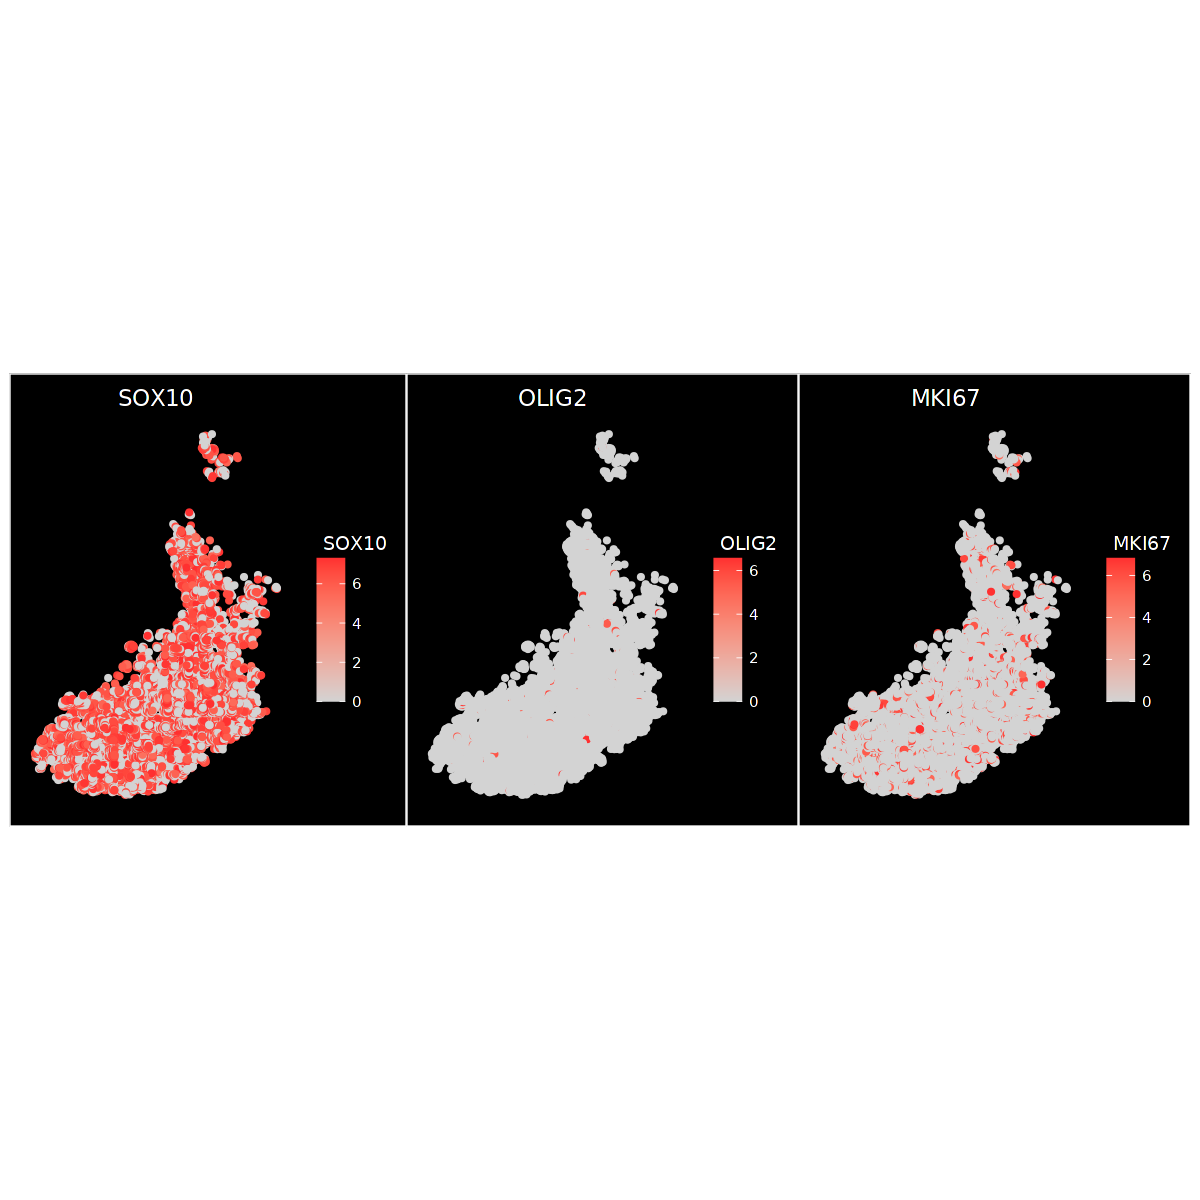

In [14]:
options(repr.plot.width=10, repr.plot.height=10)
ImageFeaturePlot(mes.tumor, fov = "fov", features = c("SOX10","OLIG2","MKI67"), 
                 combine=TRUE, size=2, axes=FALSE, max.cutoff = "q90")